In [82]:
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
from leia import SentimentIntensityAnalyzer
from nltk import tokenize
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import spacy.lang.pt
from unidecode import unidecode
from string import punctuation
import unicodedata
import re
from nltk.tokenize import word_tokenize
from nltk.util import ngrams


nltk.download('vader_lexicon')
nltk.download('rslp')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yonix42\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\yonix42\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yonix42\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [102]:
dados = pd.read_csv("./PETR4.csv")

In [103]:
analisador = SentimentIntensityAnalyzer()

def combinar_paragrafos(texto_lista):
    texto = ' '.join(texto_lista.strip("[]").replace("'", "").split(", "))
    texto = texto.lower()
    return texto

def remover_maiusculas_e_pontuacao(texto):
    texto = unicodedata.normalize('NFD', texto)
    texto = re.sub(r'[^a-zA-Z0-9\s]', '', texto)
    return texto

stopwords = spacy.lang.pt.stop_words.STOP_WORDS

def tratamento_texto(texto):
    texto_sem_acentos = unidecode(texto)
    palavras = texto_sem_acentos.split(' ')
    retorno = ''
    for p in palavras:
        if p not in stopwords:
            retorno += f"{p} "
    return retorno

def analisar_sentimento(texto):
    return analisador.polarity_scores(texto)

def tokenizacao_lemmatizer(texto):
    tokes = word_tokenize(texto)
    lemmatizer = WordNetLemmatizer()
    palavras_lemmatizadas = [lemmatizer.lemmatize(w) for w in tokes]

    return palavras_lemmatizadas

In [104]:
dados['texto'] = dados['texto'].apply(combinar_paragrafos)
dados.head()

,Unnamed: 0,titulo,data,hora,texto
0,0,Investidores estrangeiros querem entender marc...,19.09.2023,15:34,o ministro da fazenda fernando haddad disse ne...
1,1,Petrobras contrata sonda de perfuração da Fore...,19.09.2023,14:37,rio de janeiro (reuters) - a petrobras (bvmf:p...
2,2,Programa da Petrobras de crédito a fornecedore...,19.09.2023,12:35,por marta nogueira rio de janeiro (reuters) - ...
3,3,Ibovespa tem variações modestas em clima de ex...,19.09.2023,11:10,por paula arend laier são paulo (reuters) - o ...
4,4,Ibovespa tem instabildiade antes de Fed e Copo...,19.09.2023,08:28,a alta do petróleo no exterior e o aumento aci...


In [105]:
dados['sent_proc_cru'] = dados['texto'].apply(analisar_sentimento)
dados.head()

,Unnamed: 0,titulo,data,hora,texto,sent_proc_cru
0,0,Investidores estrangeiros querem entender marc...,19.09.2023,15:34,o ministro da fazenda fernando haddad disse ne...,"{'neg': 0.054, 'neu': 0.825, 'pos': 0.121, 'co..."
1,1,Petrobras contrata sonda de perfuração da Fore...,19.09.2023,14:37,rio de janeiro (reuters) - a petrobras (bvmf:p...,"{'neg': 0.019, 'neu': 0.895, 'pos': 0.086, 'co..."
2,2,Programa da Petrobras de crédito a fornecedore...,19.09.2023,12:35,por marta nogueira rio de janeiro (reuters) - ...,"{'neg': 0.039, 'neu': 0.886, 'pos': 0.074, 'co..."
3,3,Ibovespa tem variações modestas em clima de ex...,19.09.2023,11:10,por paula arend laier são paulo (reuters) - o ...,"{'neg': 0.062, 'neu': 0.907, 'pos': 0.031, 'co..."
4,4,Ibovespa tem instabildiade antes de Fed e Copo...,19.09.2023,08:28,a alta do petróleo no exterior e o aumento aci...,"{'neg': 0.058, 'neu': 0.898, 'pos': 0.044, 'co..."


In [106]:
dados['proc_1'] = dados['texto'].apply(remover_maiusculas_e_pontuacao)
dados.head()

,Unnamed: 0,titulo,data,hora,texto,sent_proc_cru,proc_1
0,0,Investidores estrangeiros querem entender marc...,19.09.2023,15:34,o ministro da fazenda fernando haddad disse ne...,"{'neg': 0.054, 'neu': 0.825, 'pos': 0.121, 'co...",o ministro da fazenda fernando haddad disse ne...
1,1,Petrobras contrata sonda de perfuração da Fore...,19.09.2023,14:37,rio de janeiro (reuters) - a petrobras (bvmf:p...,"{'neg': 0.019, 'neu': 0.895, 'pos': 0.086, 'co...",rio de janeiro reuters a petrobras bvmfpetr4 ...
2,2,Programa da Petrobras de crédito a fornecedore...,19.09.2023,12:35,por marta nogueira rio de janeiro (reuters) - ...,"{'neg': 0.039, 'neu': 0.886, 'pos': 0.074, 'co...",por marta nogueira rio de janeiro reuters o p...
3,3,Ibovespa tem variações modestas em clima de ex...,19.09.2023,11:10,por paula arend laier são paulo (reuters) - o ...,"{'neg': 0.062, 'neu': 0.907, 'pos': 0.031, 'co...",por paula arend laier sao paulo reuters o ibo...
4,4,Ibovespa tem instabildiade antes de Fed e Copo...,19.09.2023,08:28,a alta do petróleo no exterior e o aumento aci...,"{'neg': 0.058, 'neu': 0.898, 'pos': 0.044, 'co...",a alta do petroleo no exterior e o aumento aci...


In [107]:
dados['proc_2'] = dados['proc_1'].apply(tratamento_texto)
dados.head()

,Unnamed: 0,titulo,data,hora,texto,sent_proc_cru,proc_1,proc_2
0,0,Investidores estrangeiros querem entender marc...,19.09.2023,15:34,o ministro da fazenda fernando haddad disse ne...,"{'neg': 0.054, 'neu': 0.825, 'pos': 0.121, 'co...",o ministro da fazenda fernando haddad disse ne...,ministro fazenda fernando haddad disse 3 feira...
1,1,Petrobras contrata sonda de perfuração da Fore...,19.09.2023,14:37,rio de janeiro (reuters) - a petrobras (bvmf:p...,"{'neg': 0.019, 'neu': 0.895, 'pos': 0.086, 'co...",rio de janeiro reuters a petrobras bvmfpetr4 ...,rio janeiro reuters petrobras bvmfpetr4 assin...
2,2,Programa da Petrobras de crédito a fornecedore...,19.09.2023,12:35,por marta nogueira rio de janeiro (reuters) - ...,"{'neg': 0.039, 'neu': 0.886, 'pos': 0.074, 'co...",por marta nogueira rio de janeiro reuters o p...,marta nogueira rio janeiro reuters programa p...
3,3,Ibovespa tem variações modestas em clima de ex...,19.09.2023,11:10,por paula arend laier são paulo (reuters) - o ...,"{'neg': 0.062, 'neu': 0.907, 'pos': 0.031, 'co...",por paula arend laier sao paulo reuters o ibo...,paula arend laier sao paulo reuters ibovespa ...
4,4,Ibovespa tem instabildiade antes de Fed e Copo...,19.09.2023,08:28,a alta do petróleo no exterior e o aumento aci...,"{'neg': 0.058, 'neu': 0.898, 'pos': 0.044, 'co...",a alta do petroleo no exterior e o aumento aci...,alta petroleo exterior aumento acima esperado ...


In [108]:
dados['proc_3'] = dados['proc_2'].apply(tokenizacao_lemmatizer)
dados.head()

,Unnamed: 0,titulo,data,hora,texto,sent_proc_cru,proc_1,proc_2,proc_3
0,0,Investidores estrangeiros querem entender marc...,19.09.2023,15:34,o ministro da fazenda fernando haddad disse ne...,"{'neg': 0.054, 'neu': 0.825, 'pos': 0.121, 'co...",o ministro da fazenda fernando haddad disse ne...,ministro fazenda fernando haddad disse 3 feira...,"[ministro, fazenda, fernando, haddad, disse, 3..."
1,1,Petrobras contrata sonda de perfuração da Fore...,19.09.2023,14:37,rio de janeiro (reuters) - a petrobras (bvmf:p...,"{'neg': 0.019, 'neu': 0.895, 'pos': 0.086, 'co...",rio de janeiro reuters a petrobras bvmfpetr4 ...,rio janeiro reuters petrobras bvmfpetr4 assin...,"[rio, janeiro, reuters, petrobras, bvmfpetr4, ..."
2,2,Programa da Petrobras de crédito a fornecedore...,19.09.2023,12:35,por marta nogueira rio de janeiro (reuters) - ...,"{'neg': 0.039, 'neu': 0.886, 'pos': 0.074, 'co...",por marta nogueira rio de janeiro reuters o p...,marta nogueira rio janeiro reuters programa p...,"[marta, nogueira, rio, janeiro, reuters, progr..."
3,3,Ibovespa tem variações modestas em clima de ex...,19.09.2023,11:10,por paula arend laier são paulo (reuters) - o ...,"{'neg': 0.062, 'neu': 0.907, 'pos': 0.031, 'co...",por paula arend laier sao paulo reuters o ibo...,paula arend laier sao paulo reuters ibovespa ...,"[paula, arend, laier, sao, paulo, reuters, ibo..."
4,4,Ibovespa tem instabildiade antes de Fed e Copo...,19.09.2023,08:28,a alta do petróleo no exterior e o aumento aci...,"{'neg': 0.058, 'neu': 0.898, 'pos': 0.044, 'co...",a alta do petroleo no exterior e o aumento aci...,alta petroleo exterior aumento acima esperado ...,"[alta, petroleo, exterior, aumento, acima, esp..."


In [121]:
dados['sent_proc_2'] = dados['proc_2'].apply(analisar_sentimento)
dados.head()

,Unnamed: 0,titulo,data,hora,texto,sent_proc_cru,proc_1,proc_2,proc_3,sent_proc_2
0,0,Investidores estrangeiros querem entender marc...,19.09.2023,15:34,o ministro da fazenda fernando haddad disse ne...,"{'neg': 0.054, 'neu': 0.825, 'pos': 0.121, 'co...",o ministro da fazenda fernando haddad disse ne...,ministro fazenda fernando haddad disse 3 feira...,"[ministro, fazenda, fernando, haddad, disse, 3...","{'neg': 0.0, 'neu': 0.975, 'pos': 0.025, 'comp..."
1,1,Petrobras contrata sonda de perfuração da Fore...,19.09.2023,14:37,rio de janeiro (reuters) - a petrobras (bvmf:p...,"{'neg': 0.019, 'neu': 0.895, 'pos': 0.086, 'co...",rio de janeiro reuters a petrobras bvmfpetr4 ...,rio janeiro reuters petrobras bvmfpetr4 assin...,"[rio, janeiro, reuters, petrobras, bvmfpetr4, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2,Programa da Petrobras de crédito a fornecedore...,19.09.2023,12:35,por marta nogueira rio de janeiro (reuters) - ...,"{'neg': 0.039, 'neu': 0.886, 'pos': 0.074, 'co...",por marta nogueira rio de janeiro reuters o p...,marta nogueira rio janeiro reuters programa p...,"[marta, nogueira, rio, janeiro, reuters, progr...","{'neg': 0.0, 'neu': 0.992, 'pos': 0.008, 'comp..."
3,3,Ibovespa tem variações modestas em clima de ex...,19.09.2023,11:10,por paula arend laier são paulo (reuters) - o ...,"{'neg': 0.062, 'neu': 0.907, 'pos': 0.031, 'co...",por paula arend laier sao paulo reuters o ibo...,paula arend laier sao paulo reuters ibovespa ...,"[paula, arend, laier, sao, paulo, reuters, ibo...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,4,Ibovespa tem instabildiade antes de Fed e Copo...,19.09.2023,08:28,a alta do petróleo no exterior e o aumento aci...,"{'neg': 0.058, 'neu': 0.898, 'pos': 0.044, 'co...",a alta do petroleo no exterior e o aumento aci...,alta petroleo exterior aumento acima esperado ...,"[alta, petroleo, exterior, aumento, acima, esp...","{'neg': 0.0, 'neu': 0.993, 'pos': 0.007, 'comp..."


In [60]:
def retornar_sentimento(sentimento):
    if sentimento['compound'] >= 0.05:
        return 'positivo'
    elif sentimento['compound'] <= -0.05:
         return 'negativo'
    else:
        return 'neutro'

In [125]:
dados['sent_cru_texto'] = dados['sent_proc_cru'].apply(retornar_sentimento)
dados['sent_proc_2_texto'] = dados['sent_proc_2'].apply(retornar_sentimento)
dados.head()

,Unnamed: 0,titulo,data,hora,texto,sent_proc_cru,proc_1,proc_2,proc_3,sent_proc_2,sent_cru_texto,sent_proc_2_texto
0,0,Investidores estrangeiros querem entender marc...,19.09.2023,15:34,o ministro da fazenda fernando haddad disse ne...,"{'neg': 0.054, 'neu': 0.825, 'pos': 0.121, 'co...",o ministro da fazenda fernando haddad disse ne...,ministro fazenda fernando haddad disse 3 feira...,"[ministro, fazenda, fernando, haddad, disse, 3...","{'neg': 0.0, 'neu': 0.975, 'pos': 0.025, 'comp...",positivo,positivo
1,1,Petrobras contrata sonda de perfuração da Fore...,19.09.2023,14:37,rio de janeiro (reuters) - a petrobras (bvmf:p...,"{'neg': 0.019, 'neu': 0.895, 'pos': 0.086, 'co...",rio de janeiro reuters a petrobras bvmfpetr4 ...,rio janeiro reuters petrobras bvmfpetr4 assin...,"[rio, janeiro, reuters, petrobras, bvmfpetr4, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",positivo,neutro
2,2,Programa da Petrobras de crédito a fornecedore...,19.09.2023,12:35,por marta nogueira rio de janeiro (reuters) - ...,"{'neg': 0.039, 'neu': 0.886, 'pos': 0.074, 'co...",por marta nogueira rio de janeiro reuters o p...,marta nogueira rio janeiro reuters programa p...,"[marta, nogueira, rio, janeiro, reuters, progr...","{'neg': 0.0, 'neu': 0.992, 'pos': 0.008, 'comp...",positivo,positivo
3,3,Ibovespa tem variações modestas em clima de ex...,19.09.2023,11:10,por paula arend laier são paulo (reuters) - o ...,"{'neg': 0.062, 'neu': 0.907, 'pos': 0.031, 'co...",por paula arend laier sao paulo reuters o ibo...,paula arend laier sao paulo reuters ibovespa ...,"[paula, arend, laier, sao, paulo, reuters, ibo...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",negativo,neutro
4,4,Ibovespa tem instabildiade antes de Fed e Copo...,19.09.2023,08:28,a alta do petróleo no exterior e o aumento aci...,"{'neg': 0.058, 'neu': 0.898, 'pos': 0.044, 'co...",a alta do petroleo no exterior e o aumento aci...,alta petroleo exterior aumento acima esperado ...,"[alta, petroleo, exterior, aumento, acima, esp...","{'neg': 0.0, 'neu': 0.993, 'pos': 0.007, 'comp...",neutro,positivo


In [126]:
def plotar_analise(df, coluna):
    negativos = 0
    neutros = 0
    positivos = 0

    for analise in df[coluna]:
        if analise == 'positivo':
            positivos += 1
        elif analise == 'negativo':
            negativos += 1
        else:
            neutros += 1

    sentimentos = ['Negativo', 'Neutro', 'Positivo']
    quantidades = [negativos, neutros, positivos]

    print(quantidades)
    
    plt.bar(sentimentos, quantidades, color=['red', 'blue', 'green'])
    plt.xlabel('Sentimento')
    plt.ylabel('Quantidade')
    plt.title('Distribuição de Sentimentos')
    plt.show()

[17, 2, 31]


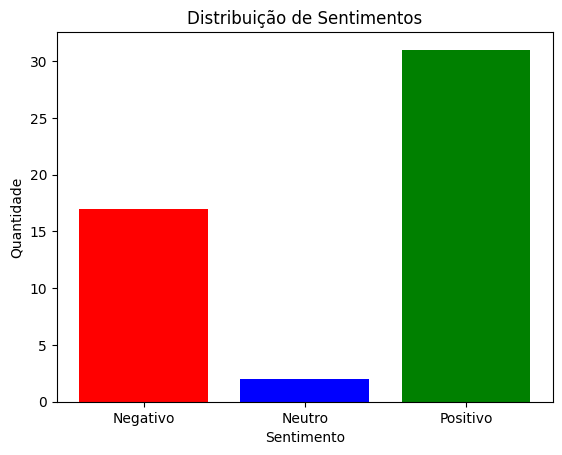

In [127]:
plotar_analise(dados, 'sent_cru_texto')

[2, 22, 26]


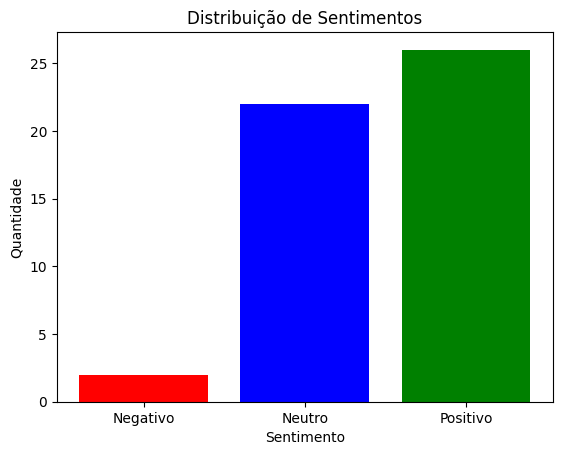

In [128]:
plotar_analise(dados, 'sent_proc_2_texto')

In [12]:
token_espaco = tokenize.WhitespaceTokenizer()
frase_processada = list()
for noticia in dados.texto:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(noticia)
    stemmer = nltk.RSLPStemmer()
    for palavra in palavras_texto:
        nova_frase.append(stemmer.stem(palavra))
        frase_processada.append(' '.join(nova_frase))

    wordnet_lemmatizer = WordNetLemmatizer()

    for palavra in palavras_texto:
        nova_frase.append(wordnet_lemmatizer.lemmatize(palavra))
        frase_processada.append(' '.join(nova_frase))

In [16]:
def filtrar_palavras(texto, idioma, palavras_relevantes):
    if idioma == 'pt' or idioma == 'pt_BR':
        palavras = texto.split()
        palavras_filtradas = [word for word in palavras if word in palavras_relevantes]
        return ' '.join(palavras_filtradas)
    else:
        return ''

In [130]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras=' '.join([texto for texto in texto[coluna_texto]])
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),
    "Frequencia":list(frequencia.values())})
    plt.figure(figsize = (12,8))
    ax=sns.barplot(data = df_frequencia.nlargest(columns="Frequencia",  n=20), x="Palavra", y="Frequencia", color="gray")
    ax.set(ylabel="Contagem")
    plt.show()

In [131]:
pareto(dados,"texto",10)

NameError: name 'token_espaco' is not defined

In [119]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.util import ngrams

# Texto pré-processado (já tokenizado, lematizado, e stemizado)
texto_preprocessado = "o cachorro correu pelo campo e pulou sobre a cerca muito muito muito muiot bom feliz demais feliz."

# Crie bigrams a partir do texto pré-processado
tokens = nltk.word_tokenize(texto_preprocessado)
bigrams = list(ngrams(tokens, 1))

# Inicialize o analisador de sentimentos do VADER
analisador = SentimentIntensityAnalyzer()

# Calcule a polaridade do sentimento para cada bigram
polaridades = []
for bigram in bigrams:
    bigram_texto = " ".join(bigram)
    sentimento = analisador.polarity_scores(bigram_texto)
    polaridades.append(sentimento['compound'])

# Avalie a polaridade composta média dos bigrams
polaridade_composta_media = sum(polaridades) / len(polaridades)

# Classifique o sentimento com base na polaridade composta média
if polaridade_composta_media >= 0.05:
    resultado_sentimento = 'Positivo'
elif polaridade_composta_media <= -0.05:
    resultado_sentimento = 'Negativo'
else:
    resultado_sentimento = 'Neutro'

# Exiba os resultados
print("Texto pré-processado:", texto_preprocessado)
print("Sentimento:", resultado_sentimento)


Texto pré-processado: o cachorro correu pelo campo e pulou sobre a cerca muito muito muito muiot bom feliz demais feliz.
Sentimento: Neutro
